Summary of trends

Your final Jupyter notebook must:


Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.


As final considerations:


You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.


Twitter Analysis

1. Fox news had the most negative comments.
2. CBS comments appear to be all positive.
3. NY times comments were closer to neutral when compared to others.


In [38]:
# Dependencies

%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import tweepy
import json
import numpy as np
from datetime import datetime
import csv
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [39]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [ ]:
# Target User Accounts
#target_users = ("@FoxNews", "@BBC", "@CNN", "@nytimes", "@CBS")



In [40]:
# Target User Account

target_user = "@FoxNews"

sentiments1 = []

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        #raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments1.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
        
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
    # Add to Counter
        counter += 1 
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))
        
    
# Confirm tweet counts
#len(tweet_times)
        
            

Tip 1: WATCH: Protesters Yell 'Shame' at Ivanka Trump as She Attends Roundtable in NY https://t.co/RLPws7eJ9q
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 16:09:08 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "insider.foxnews.com/2018/07/11/pro\u2026",
                "expanded_url": "http://insider.foxnews.com/2018/07/11/protesters-yell-shame-ivanka-trump-she-attends-roundtable-ny",
                "indices": [
                    79,
                    102
                ],
                "url": "https://t.co/RLPws7eJ9q"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 18,
    "favorited": false,
    "geo": null,
    "id": 1018165510247211009,
    "id_str": "1018165510247211009",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": n

Tip 21: .@DanGeltrude: "The substance is lower taxes, lower regulations - that has been fueling the market for awhile now."… https://t.co/asfJvR5U8k
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 14:21:00 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1018138295295827968",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/asfJvR5U8k"
            }
        ],
        "user_mentions": [
            {
                "id": 976727886,
                "id_str": "976727886",
                "indices": [
                    1,
                    13
                ],
                "name": "Dan Geltrude",
                "screen_name": "DanGeltrude"
            }
        ]
    },


Tip 41: President Trump reportedly wants a ‘more American’-looking Air Force One https://t.co/xB39fso1uG
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 10:22:48 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "fxn.ws/2NOH2uw",
                "expanded_url": "https://fxn.ws/2NOH2uw",
                "indices": [
                    73,
                    96
                ],
                "url": "https://t.co/xB39fso1uG"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 1125,
    "favorited": false,
    "geo": null,
    "id": 1018078350290702337,
    "id_str": "1018078350290702337",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "place": nul

Tip 61: .@RCamposDuffy: "This happened under Obama's watch." #Outnumbered https://t.co/NWKE7CHBOm https://t.co/iAwgIyaV6w
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 06:15:00 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    53,
                    65
                ],
                "text": "Outnumbered"
            }
        ],
        "media": [
            {
                "display_url": "pic.twitter.com/iAwgIyaV6w",
                "expanded_url": "https://twitter.com/FoxNews/status/1018015989450059777/video/1",
                "id": 1017808152681689089,
                "id_str": "1017808152681689089",
                "indices": [
                    90,
                    113
                ],
                "media_url": "http://pbs.twimg.com/media/Dh_7QWgW4AEJ7JW.jpg",
                "media_url_https": "https://pbs.twimg.com/media/Dh_7QWgW4AEJ7JW.jpg",
                

Tip 81: .@seanhannity: "Why announce these indictments today, on the eve of this meeting between the president and Vladimir… https://t.co/IAPHuCc8iE
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 02:15:00 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017955591552143361",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/IAPHuCc8iE"
            }
        ],
        "user_mentions": [
            {
                "id": 41634520,
                "id_str": "41634520",
                "indices": [
                    1,
                    13
                ],
                "name": "Sean Hannity",
                "screen_name": "seanhannity"
            }
        ]
    },
  

In [41]:
# Convert sentiments to DataFrame
sentiments1_df = pd.DataFrame.from_dict(sentiments1)
sentiments1_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0   -0.2263  Sat Jul 14 16:09:08 +0000 2018     0.872    0.128     0.000   
1    0.3595  Sat Jul 14 16:01:00 +0000 2018     0.762    0.081     0.157   
2    0.0000  Sat Jul 14 15:45:00 +0000 2018     1.000    0.000     0.000   
3    0.7845  Sat Jul 14 15:43:34 +0000 2018     0.653    0.000     0.347   
4    0.0000  Sat Jul 14 15:38:11 +0000 2018     1.000    0.000     0.000   

   Tweets ago  
0           1  
1           2  
2           3  
3           4  
4           5

In [42]:
# Target User Account

target_user = "@BBC"
sentiments2 = []

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments2.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
    # Add to Counter
        counter += 1
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))

Tip 1: "We'll definitely keep in touch!"  👋 *Immediately blocks number* #Extras 

https://t.co/9gVnLDsdq0
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 16:03:05 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    65,
                    72
                ],
                "text": "Extras"
            }
        ],
        "media": [
            {
                "display_url": "pic.twitter.com/9gVnLDsdq0",
                "expanded_url": "https://twitter.com/BBCiPlayer/status/1016370648418082822/video/1",
                "id": 1013802822725402625,
                "id_str": "1013802822725402625",
                "indices": [
                    75,
                    98
                ],
                "media_url": "http://pbs.twimg.com/media/DhHBXyDX4AY9vJh.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DhHBXyDX4AY9vJh.jpg",
                "sizes": {
        

Tip 21: "I can't pay you, but you can use the photos in your portfolio." 🙄  

Every photographer can relate to this. 

https://t.co/AIriphAyym
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Fri Jul 13 15:04:04 +0000 2018",
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/AIriphAyym",
                "expanded_url": "https://twitter.com/bbcthesocial/status/1016224182625947648/video/1",
                "id": 910170601637195776,
                "id_str": "910170601637195776",
                "indices": [
                    111,
                    134
                ],
                "media_url": "http://pbs.twimg.com/media/DKGUITlWAAAYIdO.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DKGUITlWAAAYIdO.jpg",
                "sizes": {
                    "large": {
                        "h": 1920,
                        "resize": "fit",
                        "w"

Tip 41: Walrus siestas can last a week! 💤 These incredible creatures know how to nap... 

https://t.co/qZRpNBkpuc
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 07:03:04 +0000 2018",
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/qZRpNBkpuc",
                "expanded_url": "https://twitter.com/BBCFOUR/status/1015550998717218816/video/1",
                "id": 1014531433854095366,
                "id_str": "1014531433854095366",
                "indices": [
                    82,
                    105
                ],
                "media_url": "http://pbs.twimg.com/amplify_video_thumb/1014531433854095366/img/u57wgvUE4-4ceBVL.jpg",
                "media_url_https": "https://pbs.twimg.com/amplify_video_thumb/1014531433854095366/img/u57wgvUE4-4ceBVL.jpg",
                "sizes": {
                    "large": {
                        "h": 720,
                        

Tip 61: RT @BBCSport: Just hold on...it's coming home.

#WorldCup #ThreeLions https://t.co/TCTpYhNV1s
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Wed Jul 11 09:53:20 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    48,
                    57
                ],
                "text": "WorldCup"
            },
            {
                "indices": [
                    58,
                    69
                ],
                "text": "ThreeLions"
            }
        ],
        "media": [
            {
                "display_url": "pic.twitter.com/TCTpYhNV1s",
                "expanded_url": "https://twitter.com/BBCSport/status/1016797993020936193/video/1",
                "id": 1016797976184926210,
                "id_str": "1016797976184926210",
                "indices": [
                    70,
                    93
                ],
                "media_url": "http://pbs.tw

Tip 81: RT @BBCNews: Cave rescue: Divers ready to save remaining five Thais https://t.co/ed7GteDLor
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Tue Jul 10 08:59:10 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "bbc.in/2u950YW",
                "expanded_url": "https://bbc.in/2u950YW",
                "indices": [
                    68,
                    91
                ],
                "url": "https://t.co/ed7GteDLor"
            }
        ],
        "user_mentions": [
            {
                "id": 612473,
                "id_str": "612473",
                "indices": [
                    3,
                    11
                ],
                "name": "BBC News (UK)",
                "screen_name": "BBCNews"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "geo": null,
    "id": 1016607752263753729,
    "id_str

In [43]:
# Convert sentiments to DataFrame
sentiments2_df = pd.DataFrame.from_dict(sentiments2)
sentiments2_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0    0.2714  Sat Jul 14 16:03:05 +0000 2018     0.621    0.147     0.232   
1    0.0000  Sat Jul 14 13:03:04 +0000 2018     1.000    0.000     0.000   
2    0.0000  Sat Jul 14 12:10:55 +0000 2018     1.000    0.000     0.000   
3    0.0000  Sat Jul 14 12:08:51 +0000 2018     1.000    0.000     0.000   
4    0.0000  Sat Jul 14 12:04:02 +0000 2018     1.000    0.000     0.000   

   Tweets ago  
0           1  
1           2  
2           3  
3           4  
4           5

In [44]:
# Target User Account

target_user = "@CNN"
sentiments3 = []

# Counter
counter = 1


# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments3.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
        # Add to Counter
        counter += 1
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))

Tip 1: Belgium beats England 2-0, finishing third place in the World Cup https://t.co/CgOfxgNZCd https://t.co/Rag2LuM3bW
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 16:03:49 +0000 2018",
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/Rag2LuM3bW",
                "expanded_url": "https://twitter.com/CNN/status/1018164169118486529/photo/1",
                "id": 1018164167340158976,
                "id_str": "1018164167340158976",
                "indices": [
                    90,
                    113
                ],
                "media_url": "http://pbs.twimg.com/media/DiE-6m1XcAALf2f.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DiE-6m1XcAALf2f.jpg",
                "sizes": {
                    "large": {
                        "h": 619,
                        "resize": "fit",
                        "w": 1100
                    },
 

Tip 21: The US Navy has expanded its hair rules for female sailors, now permitting braids, ponytails and lock hairstyles… https://t.co/dOUdRk9UTb
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 09:01:03 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1018057778806579205",
                "indices": [
                    114,
                    137
                ],
                "url": "https://t.co/dOUdRk9UTb"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 706,
    "favorited": false,
    "geo": null,
    "id": 1018057778806579205,
    "id_str": "1018057778806579205",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_rep

Tip 41: Mysterious burns on teen's face caused by brush with toxic plant https://t.co/oHEvX9UAW9 https://t.co/bU0ztER1VM
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 03:16:03 +0000 2018",
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/bU0ztER1VM",
                "expanded_url": "https://twitter.com/CNN/status/1017970956873224192/photo/1",
                "id": 1017970954465497090,
                "id_str": "1017970954465497090",
                "indices": [
                    89,
                    112
                ],
                "media_url": "http://pbs.twimg.com/media/DiCPMIyU0AIAez0.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DiCPMIyU0AIAez0.jpg",
                "sizes": {
                    "large": {
                        "h": 438,
                        "resize": "fit",
                        "w": 780
                    },
  

Tip 61: Republicans praise ex-FBI lawyer Lisa Page's testimony one day after the heated Peter Strzok hearing… https://t.co/9CWHzrApH9
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 01:01:03 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017936982348062726",
                "indices": [
                    102,
                    125
                ],
                "url": "https://t.co/9CWHzrApH9"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 159,
    "favorited": false,
    "geo": null,
    "id": 1017936982348062726,
    "id_str": "1017936982348062726",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_i

Tip 81: Democratic Rep. Steve Cohen says he regrets his remark that embattled FBI agent Peter Strzok deserves a Purple Hear… https://t.co/dzMh6pdXM3
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Fri Jul 13 22:51:06 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017904279477243904",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/dzMh6pdXM3"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 177,
    "favorited": false,
    "geo": null,
    "id": 1017904279477243904,
    "id_str": "1017904279477243904",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_

In [45]:
sentiments3_df = pd.DataFrame.from_dict(sentiments3)
sentiments3_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0    0.0000  Sat Jul 14 16:03:49 +0000 2018     1.000    0.000     0.000   
1    0.1280  Sat Jul 14 15:45:09 +0000 2018     0.705    0.115     0.181   
2    0.0258  Sat Jul 14 15:30:06 +0000 2018     0.927    0.000     0.073   
3    0.6597  Sat Jul 14 15:15:10 +0000 2018     0.748    0.000     0.252   
4   -0.1027  Sat Jul 14 15:01:05 +0000 2018     0.583    0.217     0.200   

   Tweets ago  
0           1  
1           2  
2           3  
3           4  
4           5

In [46]:
# Target User Account

target_user = "@nytimes"
sentiments4 = []

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments4.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
    # Add to Counter
        counter += 1
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))

Tip 1: Trump's Supreme Court nominee has talked a lot about his mother, the public servant. Just as influential in his lif… https://t.co/Kd6nSbsFnt
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 16:05:02 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1018164476867203072",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/Kd6nSbsFnt"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 66,
    "favorited": false,
    "geo": null,
    "id": 1018164476867203072,
    "id_str": "1018164476867203072",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_re

Tip 21: In Trump’s U.K. Visit, Some See ‘Infomercial’ for Money-Losing Golf Resort https://t.co/9il1esJ738
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 10:35:48 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "nyti.ms/2KXxNKq",
                "expanded_url": "https://nyti.ms/2KXxNKq",
                "indices": [
                    75,
                    98
                ],
                "url": "https://t.co/9il1esJ738"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 363,
    "favorited": false,
    "geo": null,
    "id": 1018081623621951488,
    "id_str": "1018081623621951488",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "place": 

Tip 41: "I get discriminated against all the time. No one thinks I’m a CEO. I sit on a plane and tell somebody, 'Well, I ru… https://t.co/mjB9vBw1TZ
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 04:55:42 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017996032297271296",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/mjB9vBw1TZ"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 1210,
    "favorited": false,
    "geo": null,
    "id": 1017996032297271296,
    "id_str": "1017996032297271296",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in

Tip 61: A village in Greenland is on alert amid fears that a huge iceberg could break apart and send a flood wave over the… https://t.co/ZkZKVgxChH
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 14 00:32:04 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017929689829134336",
                "indices": [
                    116,
                    139
                ],
                "url": "https://t.co/ZkZKVgxChH"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 456,
    "favorited": false,
    "geo": null,
    "id": 1017929689829134336,
    "id_str": "1017929689829134336",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_r

Tip 81: It isn't all bad out there. 7 good-news stories that we wrote about this week: https://t.co/ei62GQnv0W
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Fri Jul 13 19:42:06 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "nyti.ms/2zzJq50",
                "expanded_url": "https://nyti.ms/2zzJq50",
                "indices": [
                    79,
                    102
                ],
                "url": "https://t.co/ei62GQnv0W"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 158,
    "favorited": false,
    "geo": null,
    "id": 1017856714748637185,
    "id_str": "1017856714748637185",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "pla

In [47]:
sentiments4_df = pd.DataFrame.from_dict(sentiments4)
sentiments4_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0    0.7579  Sat Jul 14 16:05:02 +0000 2018     0.735    0.000     0.265   
1   -0.5574  Sat Jul 14 15:50:02 +0000 2018     0.833    0.167     0.000   
2    0.7314  Sat Jul 14 15:35:05 +0000 2018     0.549    0.142     0.309   
3    0.4199  Sat Jul 14 15:20:03 +0000 2018     0.883    0.000     0.117   
4    0.0000  Sat Jul 14 15:05:06 +0000 2018     1.000    0.000     0.000   

   Tweets ago  
0           1  
1           2  
2           3  
3           4  
4           5

In [48]:
# Target User Account

target_user = "@CBS"
sentiments5 = []

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments5.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
    # Add to Counter
        counter += 1
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))

Tip 1: Stand up. Speak up. Blow the whistle. 

Don't miss the premiere of the @TrueCrimeCBS series #Whistleblower tonight… https://t.co/uNhx4Codc2
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Fri Jul 13 21:35:01 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    92,
                    106
                ],
                "text": "Whistleblower"
            }
        ],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017885133590786049",
                "indices": [
                    116,
                    139
                ],
                "url": "https://t.co/uNhx4Codc2"
            }
        ],
        "user_mentions": [
            {
                "id": 765647354791759872,
                "id_str": "765647354791759872",
                "indi

Tip 21: Every day is #TakeYourDogToWorkDay for shows like @HawaiiFive0CBS, @MomCBS, @SEALTeamCBS, and @bigbangtheory! https://t.co/DJaOt1VQcw
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Fri Jun 22 18:33:53 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    13,
                    34
                ],
                "text": "TakeYourDogToWorkDay"
            }
        ],
        "media": [
            {
                "display_url": "pic.twitter.com/DJaOt1VQcw",
                "expanded_url": "https://twitter.com/CBS/status/1010229404696342529/photo/1",
                "id": 1010223375564718081,
                "id_str": "1010223375564718081",
                "indices": [
                    110,
                    133
                ],
                "media_url": "http://pbs.twimg.com/media/DgUIzsRUwAElmsq.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DgUIzsRUwAEl

Tip 41: The Boss looks right at home on the #TonyAwards stage! https://t.co/pwjv4iydkn
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Jun 11 02:53:00 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    36,
                    47
                ],
                "text": "TonyAwards"
            }
        ],
        "media": [
            {
                "display_url": "pic.twitter.com/pwjv4iydkn",
                "expanded_url": "https://twitter.com/CBS/status/1006006356392853504/photo/1",
                "id": 1006005695894831104,
                "id_str": "1006005695894831104",
                "indices": [
                    55,
                    78
                ],
                "media_url": "http://pbs.twimg.com/media/DfYM2bHUwAAkGVL.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DfYM2bHUwAAkGVL.jpg",
                "sizes": {
                    "large": {

Tip 61: RT @KatLargent: MAGIC #TonyAwards
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Jun 11 01:25:59 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    22,
                    33
                ],
                "text": "TonyAwards"
            }
        ],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 426747797,
                "id_str": "426747797",
                "indices": [
                    3,
                    14
                ],
                "name": "Kat Largent",
                "screen_name": "KatLargent"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "geo": null,
    "id": 1005984457810051072,
    "id_str": "1005984457810051072",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,


Tip 81: Representing the hardest-working men and women in Broadway… ensemble members from every nominated musical tonight!… https://t.co/imlEEnOUla
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Jun 11 00:22:15 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1005968419072557056",
                "indices": [
                    116,
                    139
                ],
                "url": "https://t.co/imlEEnOUla"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 188,
    "favorited": false,
    "geo": null,
    "id": 1005968419072557056,
    "id_str": "1005968419072557056",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_r

In [49]:
sentiments5_df = pd.DataFrame.from_dict(sentiments5)
sentiments5_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0    0.1139  Fri Jul 13 21:35:01 +0000 2018     0.922    0.000     0.078   
1   -0.4404  Fri Jul 13 21:15:41 +0000 2018     0.868    0.132     0.000   
2    0.0000  Fri Jul 13 17:49:38 +0000 2018     1.000    0.000     0.000   
3    0.6514  Thu Jul 12 01:01:24 +0000 2018     0.718    0.000     0.282   
4    0.5562  Wed Jul 11 21:44:45 +0000 2018     0.826    0.000     0.174   

   Tweets ago  
0           1  
1           2  
2           3  
3           4  
4           5

<IPython.core.display.Javascript object>


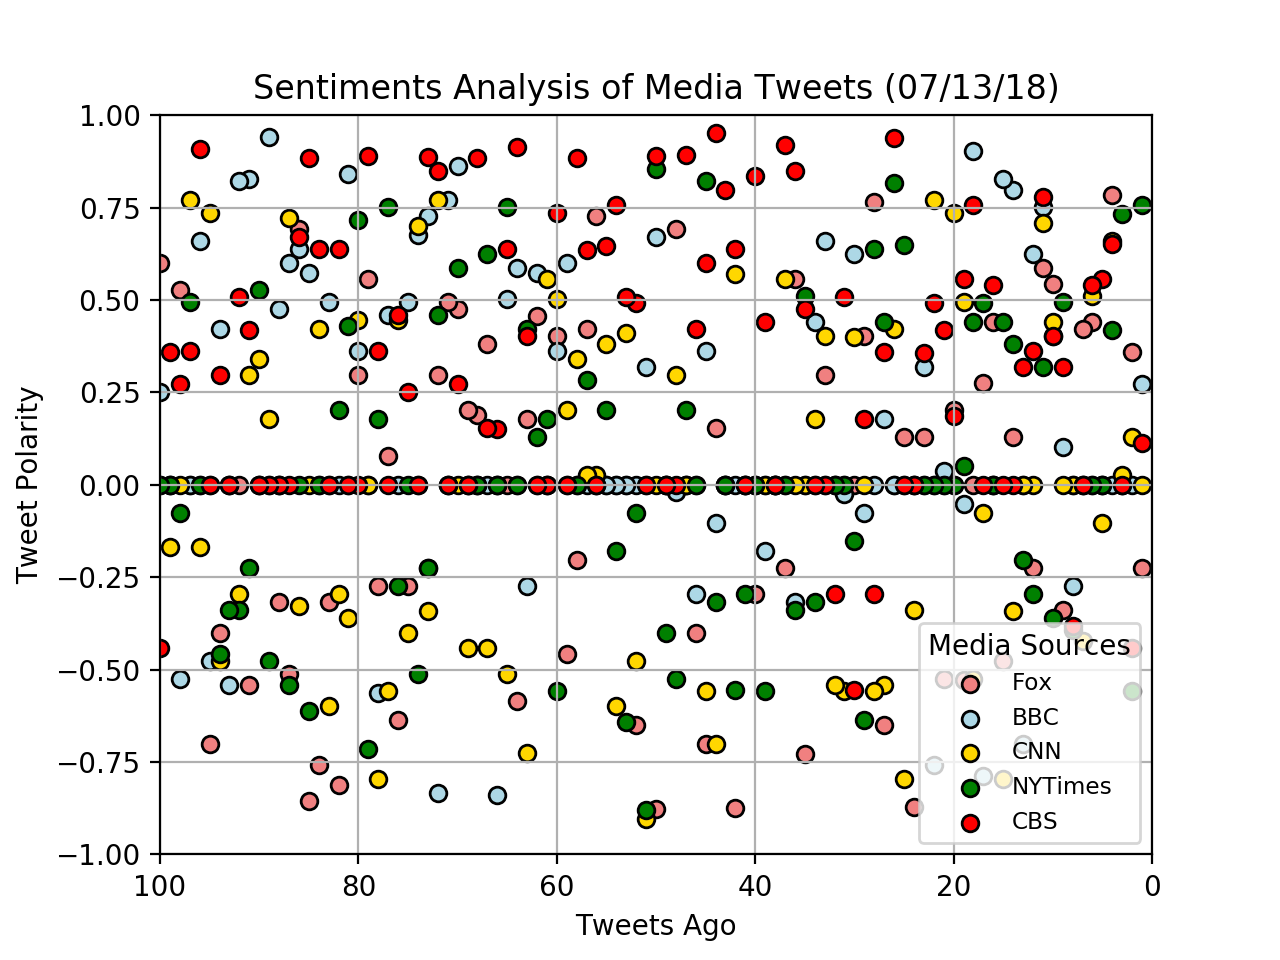

In [64]:
plt.scatter(x=sentiments1_df["Tweets ago"], y=sentiments1_df["Compound"], color= "lightcoral", edgecolor = "black", label = "Fox")
plt.scatter(sentiments2_df["Tweets ago"], sentiments2_df["Compound"], color= "lightblue", edgecolor = "black", label = "BBC")
plt.scatter(sentiments3_df["Tweets ago"], sentiments3_df["Compound"], color= "gold", edgecolor = "black", label = "CNN")
plt.scatter(sentiments4_df["Tweets ago"], sentiments4_df["Compound"], color= "green", edgecolor = "black", label = "NYTimes")
plt.scatter(sentiments5_df["Tweets ago"], sentiments5_df["Compound"], color= "red", edgecolor = "black", label = "CBS")

plt.title("Sentiments Analysis of Media Tweets (07/13/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((100,0))
plt.ylim((-1.0, 1.0))
plt.grid(True)

# create the legend
legend = plt.legend(
    fontsize="small",
    mode="Expanded",
    loc="best",
    title="Media Sources"
)

plt.savefig("twitter_sentiments.png")
plt.show()

In [ ]:
#The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization.
#For this plot, you will again aggregate the compound sentiments analyzed by VADER.



In [74]:

tweet_polarity = [-0.20, -0.15, -0.10, -0.05, 0.0, 0.05]

x_axis = np.arange(len(tweet_polarity))

<IPython.core.display.Javascript object>


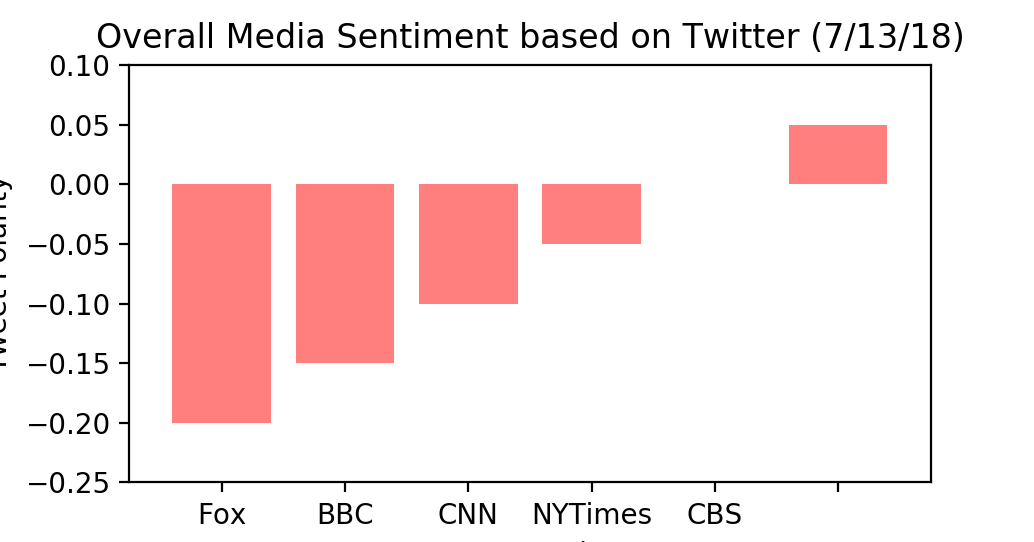

<Container object of 6 artists>

In [75]:
plt.bar(x_axis, tweet_polarity, color='r', alpha=0.5, align="center")

In [76]:
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Fox", "BBC", "CNN", "NYTimes", "CBS"])

([<matplotlib.axis.XTick at 0x1184cdfd0>,
 <a list of 5 Text xticklabel objects>)

In [77]:
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 5.75)

In [78]:
# Set the limits of the y axis
plt.ylim(-0.25,+0.10)

(-0.25, 0.1)

In [79]:
# Give the chart a title, x label, and y label
plt.title("Overall Media Sentiment based on Twitter (7/13/18)")
plt.xlabel("News Outlet")
plt.ylabel("Tweet Polarity")

plt.savefig("twitter_sentiments_bar.png")
plt.show()

In [82]:
# Export to CSV
sentiments1_df.to_csv("fox_tweets.csv", index=False)
sentiments2_df.to_csv("bbc_tweets.csv", index=False)
sentiments3_df.to_csv("cnn_tweets.csv", index=False)
sentiments4_df.to_csv("nytimes_tweets.csv", index=False)
sentiments5_df.to_csv("cbs_tweets.csv", index=False)

